# K-means clustering

## Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

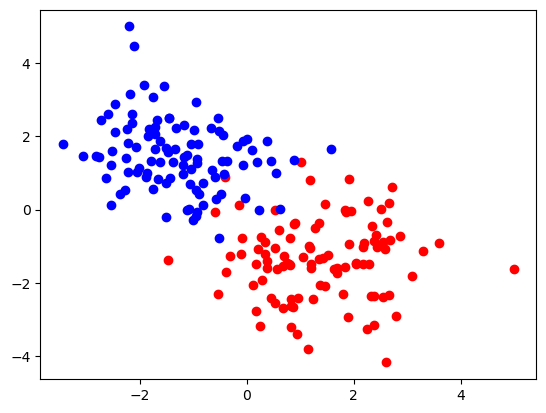

In [33]:
n = 100
d = 2
ranges = 1.25
postives = np.random.randn(n, d) + np.array([ranges, -ranges])
negatives = np.random.randn(n, d) + np.array([-ranges, ranges])

plt.scatter(postives[:, 0], postives[:, 1], color='red')
plt.scatter(negatives[:, 0], negatives[:, 1], color='blue')

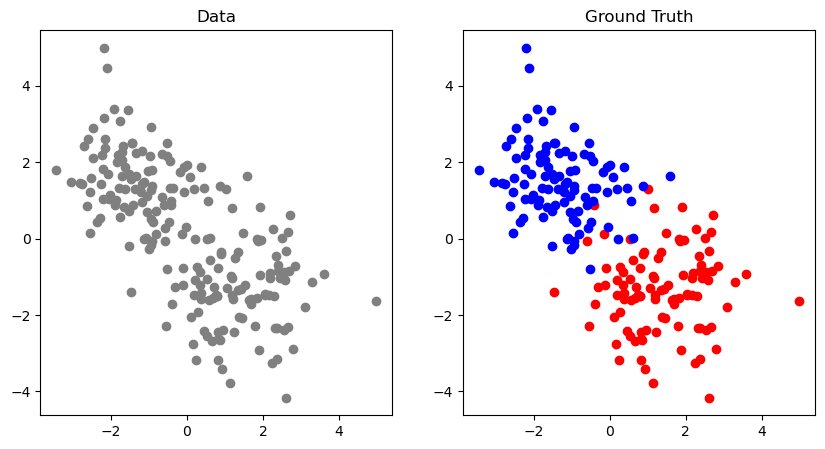

In [34]:
postives = np.column_stack((postives, np.ones(n)))
negatives = np.column_stack((negatives, np.zeros(n)))

data = np.vstack((postives, negatives))
np.random.shuffle(data)

X, y = data[:, :-1], data[:, -1] 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
_ = axes[0].scatter(X[:,0], X[:,1], color='gray')
_ = axes[0].set_title('Data')
_ = axes[1].scatter(X[y == 1, 0], X[y == 1, 1], color='red')
_ = axes[1].scatter(X[y == 0, 0], X[y == 0, 1], color='blue')
_ = axes[1].set_title('Ground Truth')

## KMeans with inbuilt functions

In [35]:
from sklearn.cluster import KMeans 

k_means_builtin = KMeans(n_clusters=2, init='random')

k_means_builtin.fit(X)

y_pred = k_means_builtin.predict(X)

y_pred.shape, np.unique(y_pred,return_counts=True)

c:\Users\myalla\anaconda3\envs\iisc\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2)

((200,), (array([0, 1]), array([ 98, 102], dtype=int64)))

In [36]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y, y_pred)
# y_pred2 = np.where(y_pred==1,0,1)
# accuracy2 = accuracy_score(y, y_pred2)
# accuracy = max(accuracy1, accuracy2)
accuracy = max(accuracy1, 1 - accuracy1)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


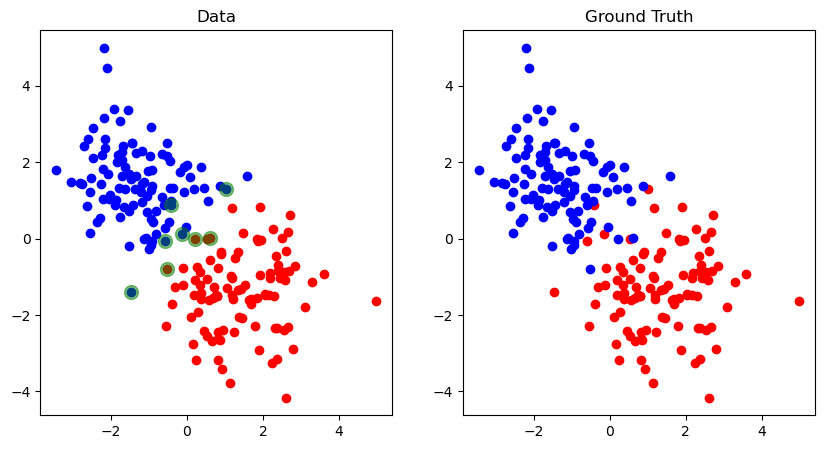

In [37]:
if accuracy1 < (1-accuracy1):
    y_pred = np.where(y_pred==1,0,1)
    
misclassified = y_pred != y

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# _ = axes[0].scatter(X[:,0], X[:,1], color='gray')
_ = axes[0].scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='red')
_ = axes[0].scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], color='blue')
_ = axes[0].scatter(X[misclassified, 0], X[misclassified, 1], color='green', s=100, alpha=0.5)
_ = axes[0].set_title('Data')
_ = axes[1].scatter(X[y == 1, 0], X[y == 1, 1], color='red')
_ = axes[1].scatter(X[y == 0, 0], X[y == 0, 1], color='blue')
_ = axes[1].set_title('Ground Truth')

##  Custom implementation to solve KMeans